In [3]:
from serial import Serial
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def plot_profile(filename):
    data = np.genfromtxt(filename, delimiter=',')
    t = data[:,0]
    v_sp = data[:,1]
    v_meas = data[:,2]

    plt.figure()
    plt.plot(t, v_sp)
    plt.plot(t, v_meas)
    plt.xlabel('Time [s]')
    plt.ylabel('Angular Velocity [rad/s]')
    plt.show()

In [7]:
def run_profile(omega_ss, t_ss, t_acc, t_stop, kp, ki, filename):
    # Uncomment this line and give the name of the serial port which the Nucleo
    # is connected to, as a string. This should be something like
    # 'COMx' for Windows and
    # '/dev/tty.usbmodemXXXX' for Mac/Linux
    # Windows: Open Device Manager and look under "Ports (COM & LPT)" for a 
    # "USB Serial Device"
    # Mac/Linux: Open terminal and run "ls /dev/tty.*" to find the port matching the
    # format above.
    serport = '/dev/tty.usbmodem2072318E414B2'
    
    # Open the serial port, and give it the name ser.
    with Serial(serport, baudrate=115200, timeout=5) as ser:
        # Restart the microcontroller
        ser.write(b'\x02\x04')
        # Write the parameters to the microcontroller
        ser.write((str(omega_ss) + '\r\n').encode())
        ser.write((str(t_ss) + '\r\n').encode())
        ser.write((str(t_acc) + '\r\n').encode())
        ser.write((str(t_stop) + '\r\n').encode())
        ser.write((str(kp) + '\r\n').encode())
        ser.write((str(ki) + '\r\n').encode())

        # Open the data file for writing, and give it the name datafile
        with open(filename, 'w') as f:
            while True:
                # Read the current line and decode from bytes to a string
                line = ser.readline().decode()
                # Print the line so we can see what the microcontroller is doing
#                 print(line, end='')
                # If the line starts with END, then we know the data is complete
                if line[:3] == 'END':
                    break
                # If the line has a comma, it is a line of CSV data.
                elif ',' in line:
                    f.write(line.strip() + '\n')
        
        plot_profile(filename)

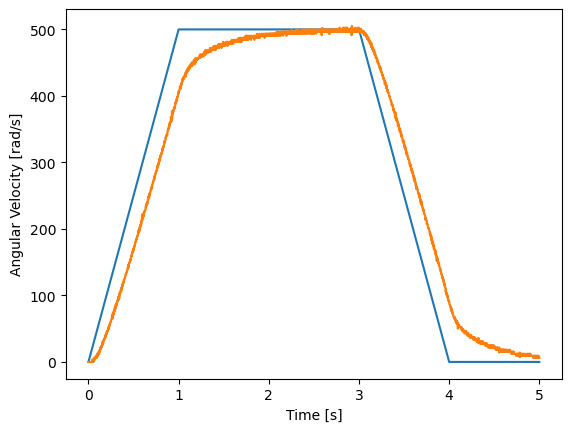

In [11]:
run_profile(500, 2, 0.5, 1, 0.2, 0.5, 'data1.csv')

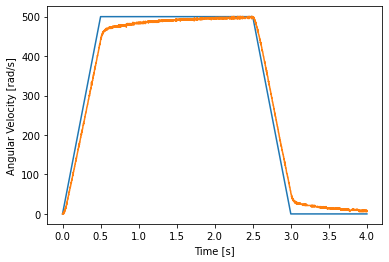

In [27]:
run_profile(500, 2, 0.5, 1, 0.2, 1.2, 'data2.csv')

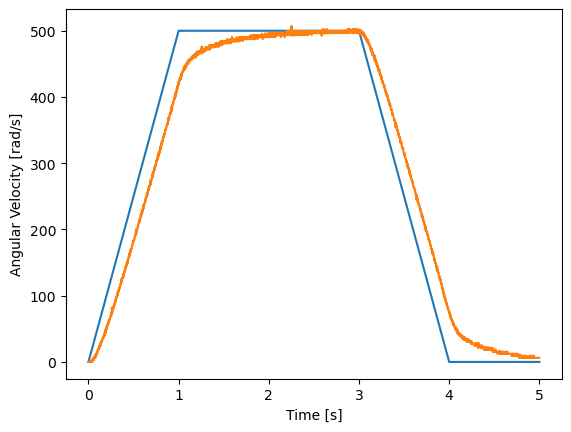

In [17]:
run_profile(500, 2, 1, 1, 0.25, 0.6, 'data3.csv')

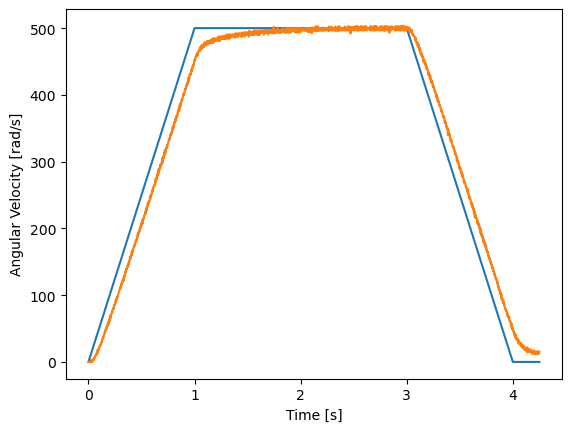

In [33]:
run_profile(500, 2, 1, 0.25, 0.4, 1, 'data4.csv')

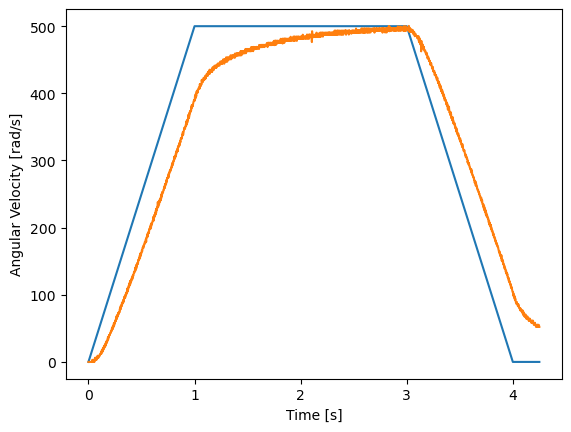

In [35]:
run_profile(500, 2, 1, 0.25, 0.2, 0.4, 'data5.csv')